# Briefing

This notebook will show how to calculate distance in meters between two coordinates with format WGS84

# Imports

In [1]:
import pandas as pd
import numpy as np
import math

# Datasets

In [65]:
df_lat_long = pd.DataFrame(columns=['ID','Latitude','Longitude'],
                           data=[['A',-22.85062,-47.05375],
                                 ['B',-22.85544,-47.04473]])

df_lat_long.head()

,ID,Latitude,Longitude
0,A,-22.85062,-47.05375
1,B,-22.85544,-47.04473


# Calculate distance

In [54]:
def get_distance_lat_long_m(pos1, pos2):
  
  lat1 = pos1[0]
  lon1 = pos1[1]
  lat2 = pos2[0]
  lon2 = pos2[1]

  r = 6371000 # Earth radius in meters
  
  d = np.arccos(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180) + np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos(lon2*np.pi/180-lon1*np.pi/180) ) * r
  
  return d

In [58]:
dist_a_b = get_distance_lat_long_m(
    df_lat_long[df_lat_long.ID == 'A'][['LAT_Y','LONG_X']].values[0],
    df_lat_long[df_lat_long.ID == 'B'][['LAT_Y','LONG_X']].values[0],
    )

# Plot in map

In [67]:
import geopandas as gpd

In [70]:
gdf_lat_long = gpd.GeoDataFrame(df_lat_long, geometry=gpd.points_from_xy(df_lat_long.Longitude, df_lat_long.Latitude))

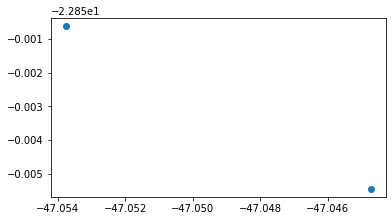

In [72]:
gdf_lat_long.plot()

In [ ]:
#!pip install keplergl

In [62]:
#from google.colab import output
#from keplergl import KeplerGl
#output.enable_custom_widget_manager()


#map_ab = KeplerGl()
#map_ab.add_data(data=df_lat_long)
#map_ab

In [ ]:
#from google.colab import output
#output.disable_custom_widget_manager()